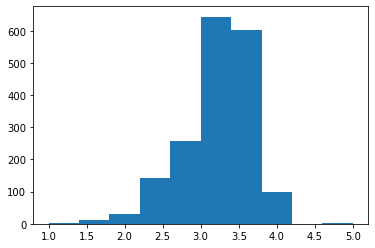

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


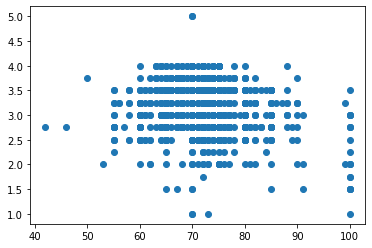

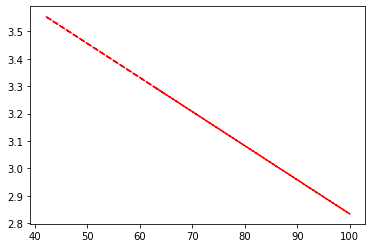

In [40]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

webpage = requests.get("https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html")
soup = BeautifulSoup(webpage.content, "html.parser")
ratings_data = soup.find_all(attrs={"class": "Rating"})
ratings = []
for rating in ratings_data[1:]:
  ratings.append(float(rating.string))
#print(ratings)
plt.hist(ratings)
plt.show()

companies_data = soup.find_all(attrs={"class": "Company"})
companies = []
for company in companies_data[1:]:
    companies.append(company.string)
#print(companies)
dict = {
    "Company" : companies,
    "Rating" : ratings,
    "CocoaPercent": cocoa_pcts
}
df = pd.DataFrame.from_dict(dict)
df.head()
mean_ratings = df.groupby('Company').Rating.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

cocoa_data = soup.find_all(attrs={"class": "CocoaPercent"})
cocoa_pcts=[]
for cocoa_pct in cocoa_data[1:]:
    cocoa_pcts.append(int(float(cocoa_pct.string[:-1])))
df.head()
plt.scatter(df.CocoaPercent, df.Rating)
plt.show()
z = np.polyfit(df.CocoaPercent, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercent, line_function(df.CocoaPercent), "r--")
plt.show()